In [1]:
#importing required libraries
import pyforest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#loading the data
data=pd.read_csv("SEER Breast Cancer Dataset .csv")
data.head()

<IPython.core.display.Javascript object>

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [3]:
data.tail()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


In [4]:
data['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

In [5]:
#data analysisi and exploration
data.shape

(4024, 16)

In [6]:
#getting the column names
data.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [7]:
#checking the null values
data.isna().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [8]:
#checking for duplicates
data.duplicated().sum()

1

In [9]:
#getting the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [10]:
#getting the statistical summary
data.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


In [11]:
#data cleaning
data.drop(["Unnamed: 3","Race ","Status","Survival Months","Marital Status","Age"],axis=1,inplace=True)


In [12]:
data.isna().sum()

T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
dtype: int64

In [13]:
data.head()

,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
0,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11
1,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9
2,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1
3,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1
4,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5


In [14]:
#dropping the duplicates
data=data.drop_duplicates()


In [15]:
#checking whether there are other duplicates
data.duplicated().sum()

0

In [16]:
stages=data["6th Stage"].unique()
stages

array(['IIIC', 'IIIA', 'IIB', 'IIA', 'IIIB'], dtype=object)

In [17]:
#data preprocessing 
#encoding non-numerical to numericals
lb=LabelEncoder()
data["T Stage "]=lb.fit_transform(data["T Stage "])
# data["6th Stage"]=lb.fit_transform(data["6th Stage"])
data["N Stage"]=lb.fit_transform(data["N Stage"])
data["Progesterone Status"]=lb.fit_transform(data["Progesterone Status"])
data["Estrogen Status"]=lb.fit_transform(data["Estrogen Status"])
data["A Stage"]=lb.fit_transform(data["A Stage"])


In [18]:
stage=data["6th Stage"].unique()
stage

array(['IIIC', 'IIIA', 'IIB', 'IIA', 'IIIB'], dtype=object)

In [19]:
data.head()

,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
0,1,2,IIIC,Moderately differentiated; Grade II,1,40,1,1,19,11
1,1,1,IIIA,Moderately differentiated; Grade II,1,45,1,1,25,9
2,1,0,IIB,Poorly differentiated; Grade III,1,25,1,1,4,1
3,0,0,IIA,Moderately differentiated; Grade II,1,19,1,1,26,1
4,1,1,IIIA,Moderately differentiated; Grade II,1,35,1,1,21,5


In [20]:
data["A Stage"].unique()

array([1, 0])

In [21]:
data["N Stage"].unique()

array([2, 1, 0])

In [22]:
stages_mapping = {
    'IIA': 1,
    'IIB': 2,
    'IIIA': 3,
    'IIIB': 4,
    'IIIC': 5,
   
}

# Apply the mapping using the lambda function to the "6th Stage" column
data['6th Stage' ] = data['6th Stage'].map(stages_mapping)



In [23]:
grade_mapping = {
    'Well differentiated; Grade I': 1,
    'Moderately differentiated; Grade II': 2,
    'Poorly differentiated; Grade III': 3,
    'Undifferentiated; anaplastic; Grade IV': 4,
   
}

# Apply the mapping using the lambda function to the "6th Stage" column
data['Grade' ] = data['Grade'].map(grade_mapping)



In [24]:
x=data.drop("6th Stage", axis=1)
y=data["6th Stage"]

In [25]:
data.head()

,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
0,1,2,5,2,1,40,1,1,19,11
1,1,1,3,2,1,45,1,1,25,9
2,1,0,2,3,1,25,1,1,4,1
3,0,0,1,2,1,19,1,1,26,1
4,1,1,3,2,1,35,1,1,21,5


In [26]:
data.tail()

,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
4019,0,0,1,1,1,10,1,1,19,1
4020,0,1,3,3,1,9,0,0,13,5
4021,0,0,1,2,1,9,0,0,4,2
4022,0,0,1,2,1,9,1,1,14,2
4023,0,0,1,2,1,8,1,1,1,1


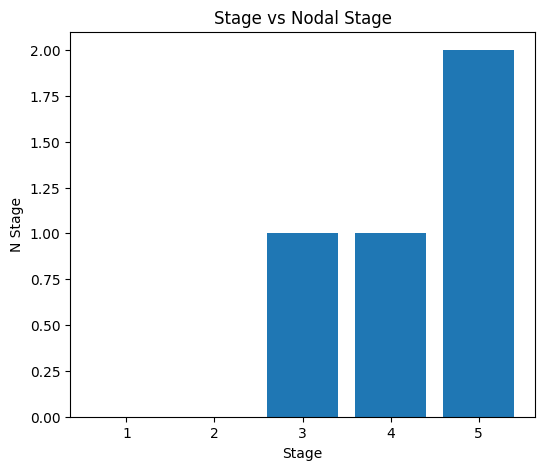

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(data["6th Stage"],data["N Stage"])
plt.title('Stage vs Nodal Stage')
plt.xlabel('Stage')
plt.ylabel('nodal Stage')
plt.show()


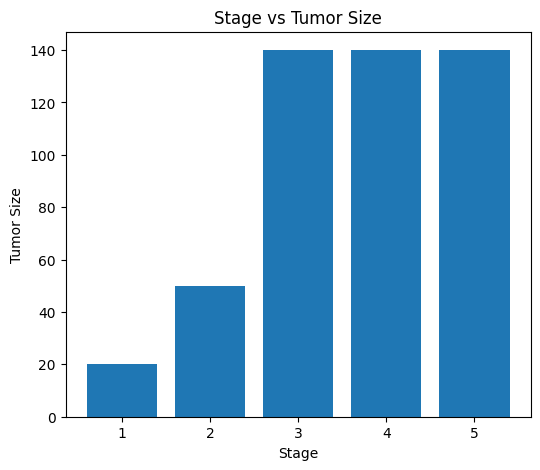

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.bar(data["6th Stage"],data["Tumor Size"])
plt.title('Stage vs Tumor Size')
plt.xlabel('Stage')
plt.ylabel('Tumor Size')
plt.show()


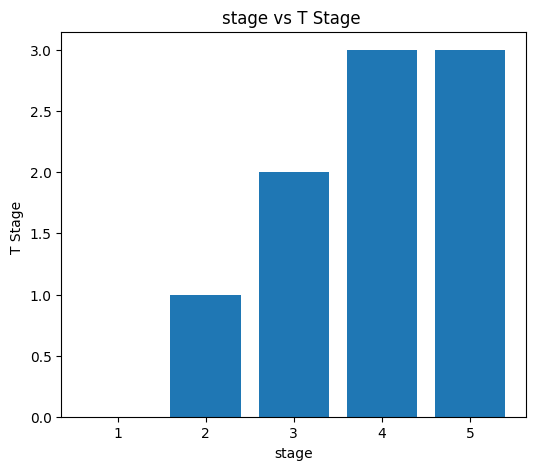

In [86]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 5))
plt.bar(data["6th Stage"],data["T Stage "])
plt.title('stage vs T Stage ')
plt.xlabel('stage')
plt.ylabel('T Stage ')
plt.show()


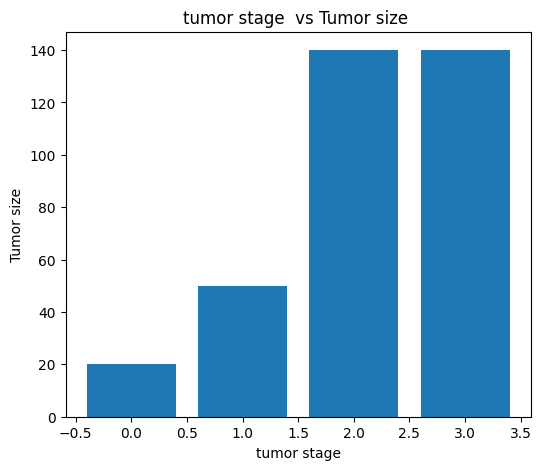

In [105]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 5))
plt.bar(data["T Stage "],data["Tumor Size"])
plt.title('tumor stage  vs Tumor size ')
plt.xlabel('tumor stage')
plt.ylabel('Tumor size')
plt.show()


In [29]:
data.columns

Index(['T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive'],
      dtype='object')

## Data visualization

In [30]:
import warnings 
warnings.simplefilter

<function warnings.simplefilter(action, category=<class 'Warning'>, lineno=0, append=False)>

<IPython.core.display.Javascript object>

/tmp/ipykernel_26719/249345964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Tumor Size'])


<Axes: xlabel='Tumor Size', ylabel='Density'>

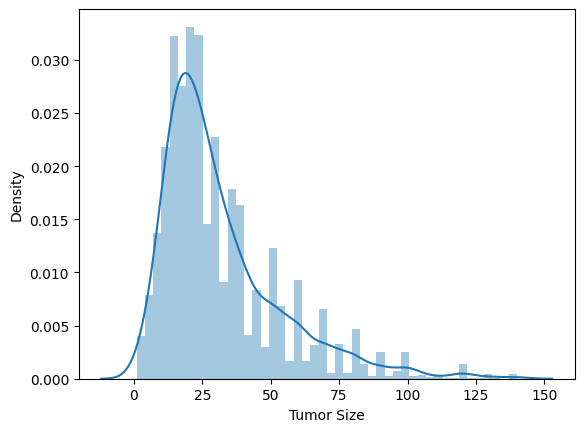

In [31]:
sns.distplot(data['Tumor Size'])

<IPython.core.display.Javascript object>

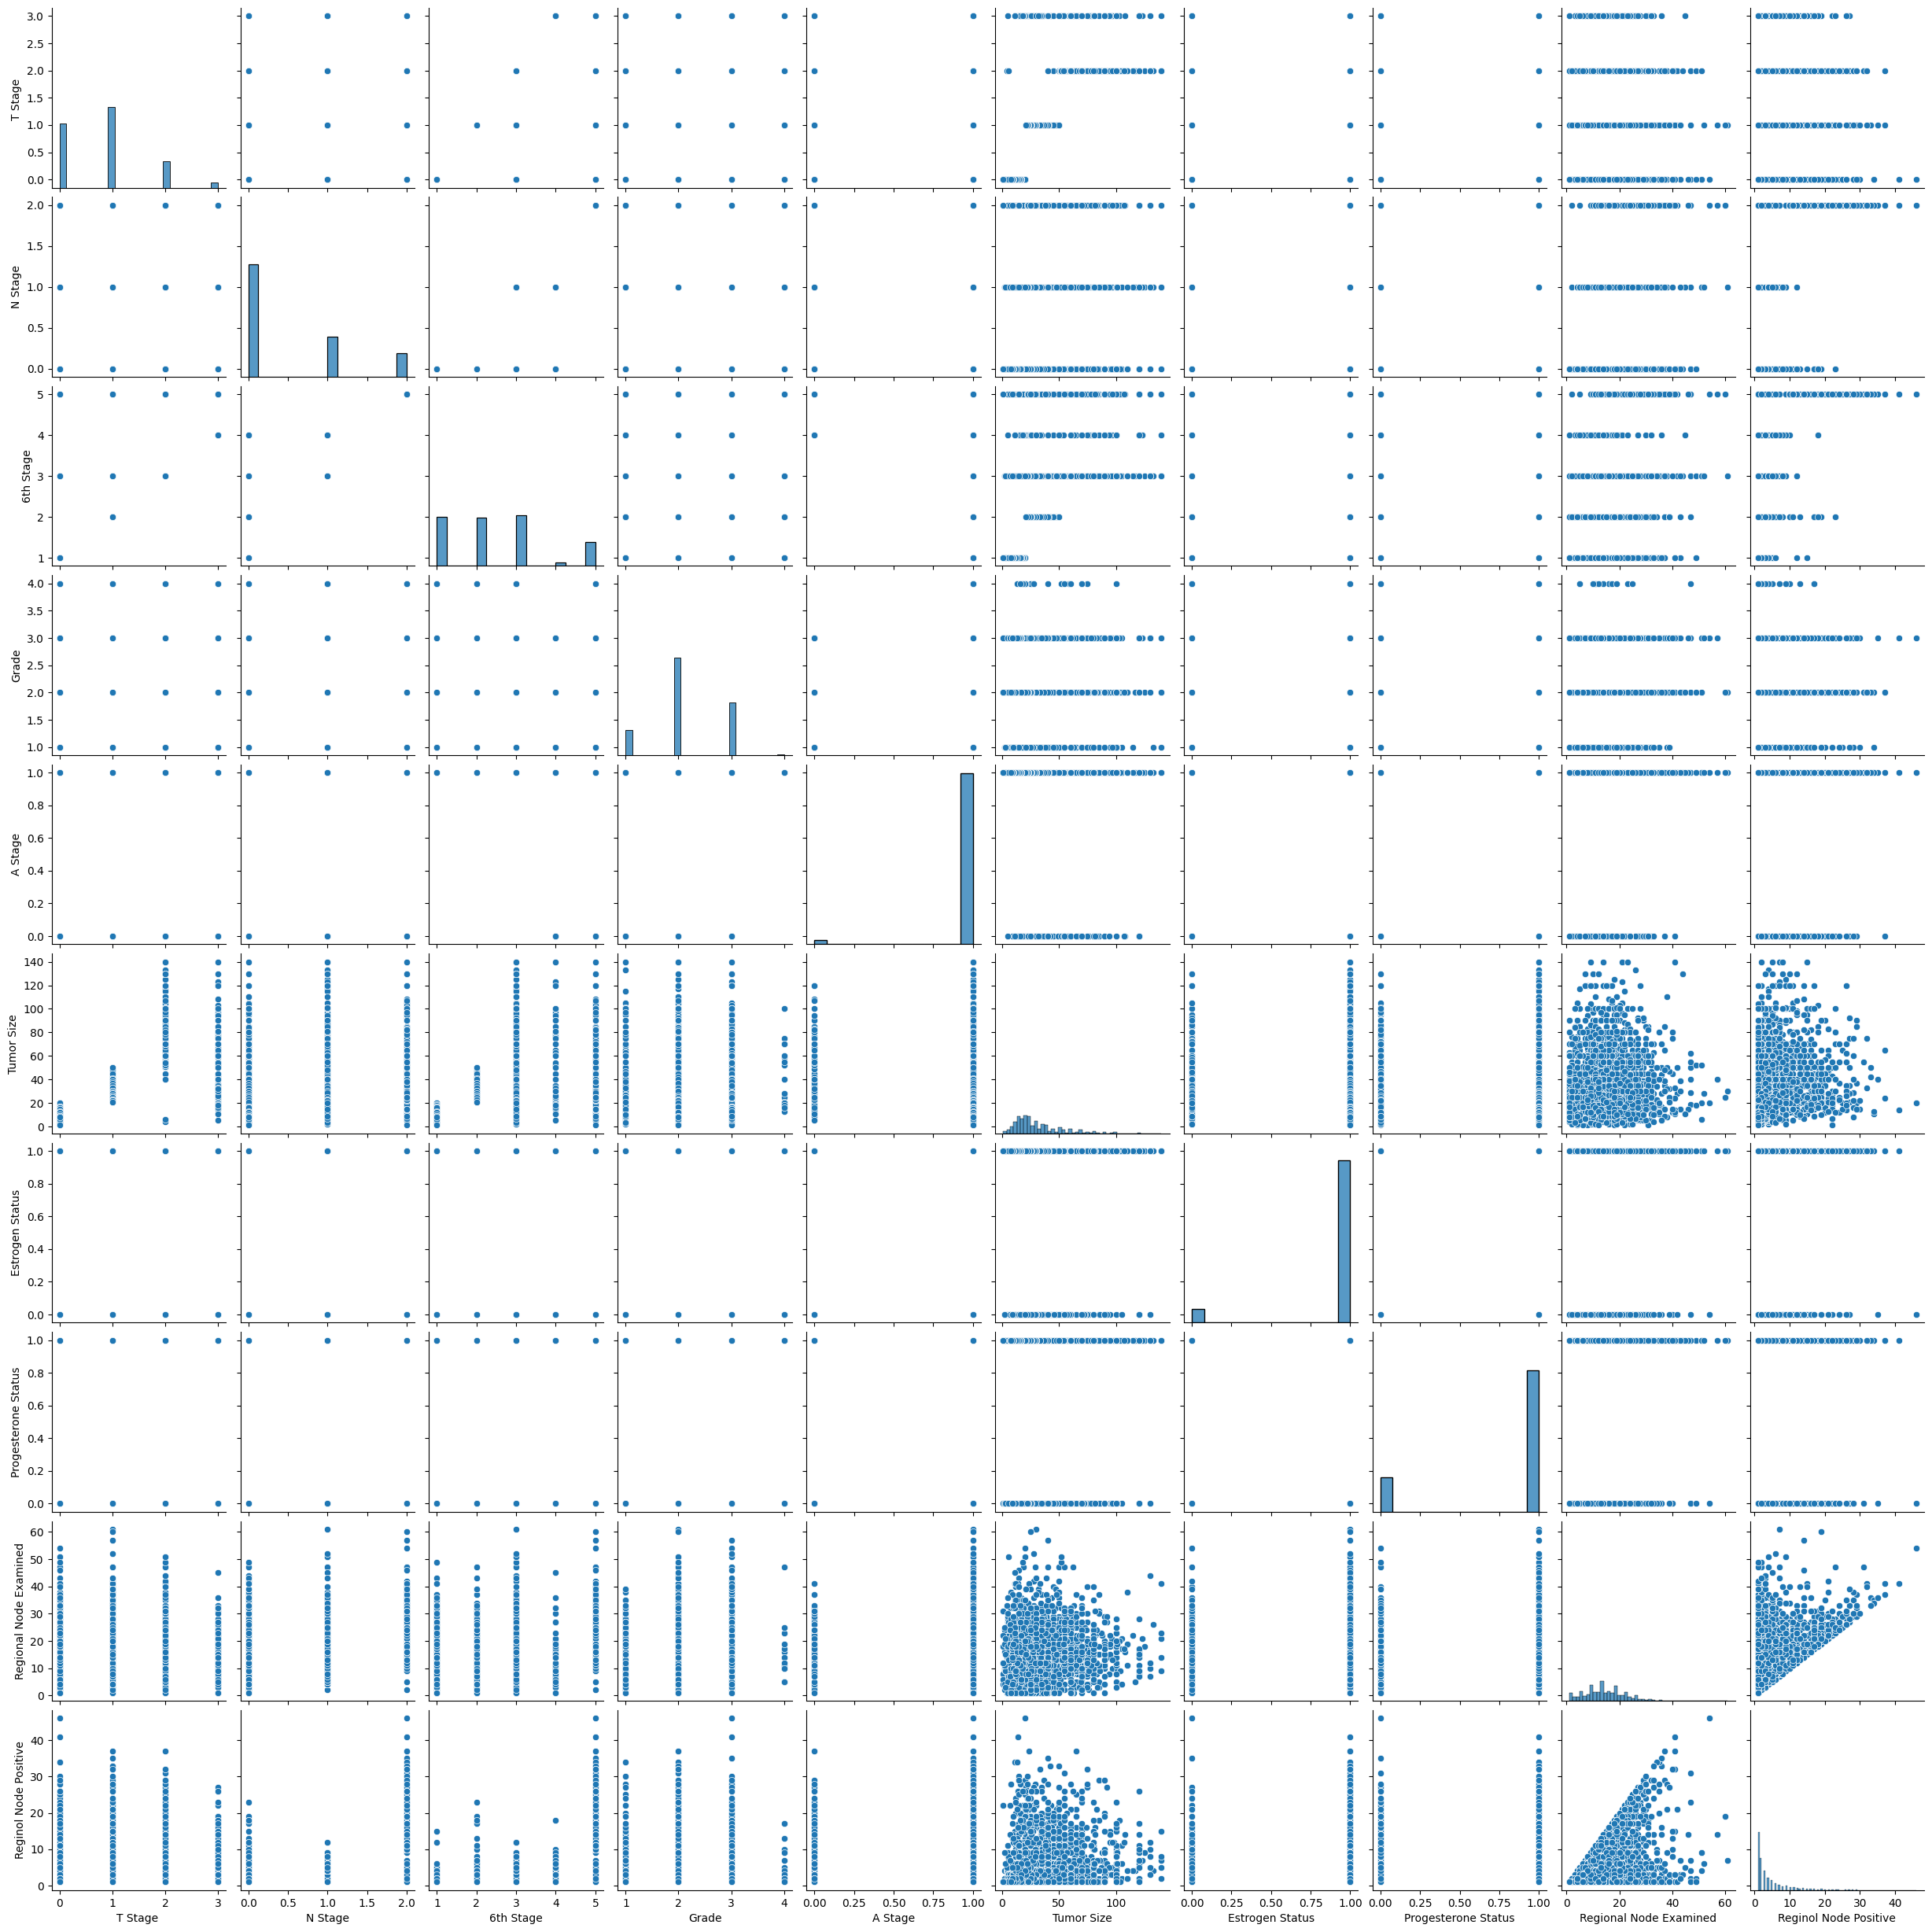

In [32]:
sns.pairplot(data=data)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<IPython.core.display.Javascript object>

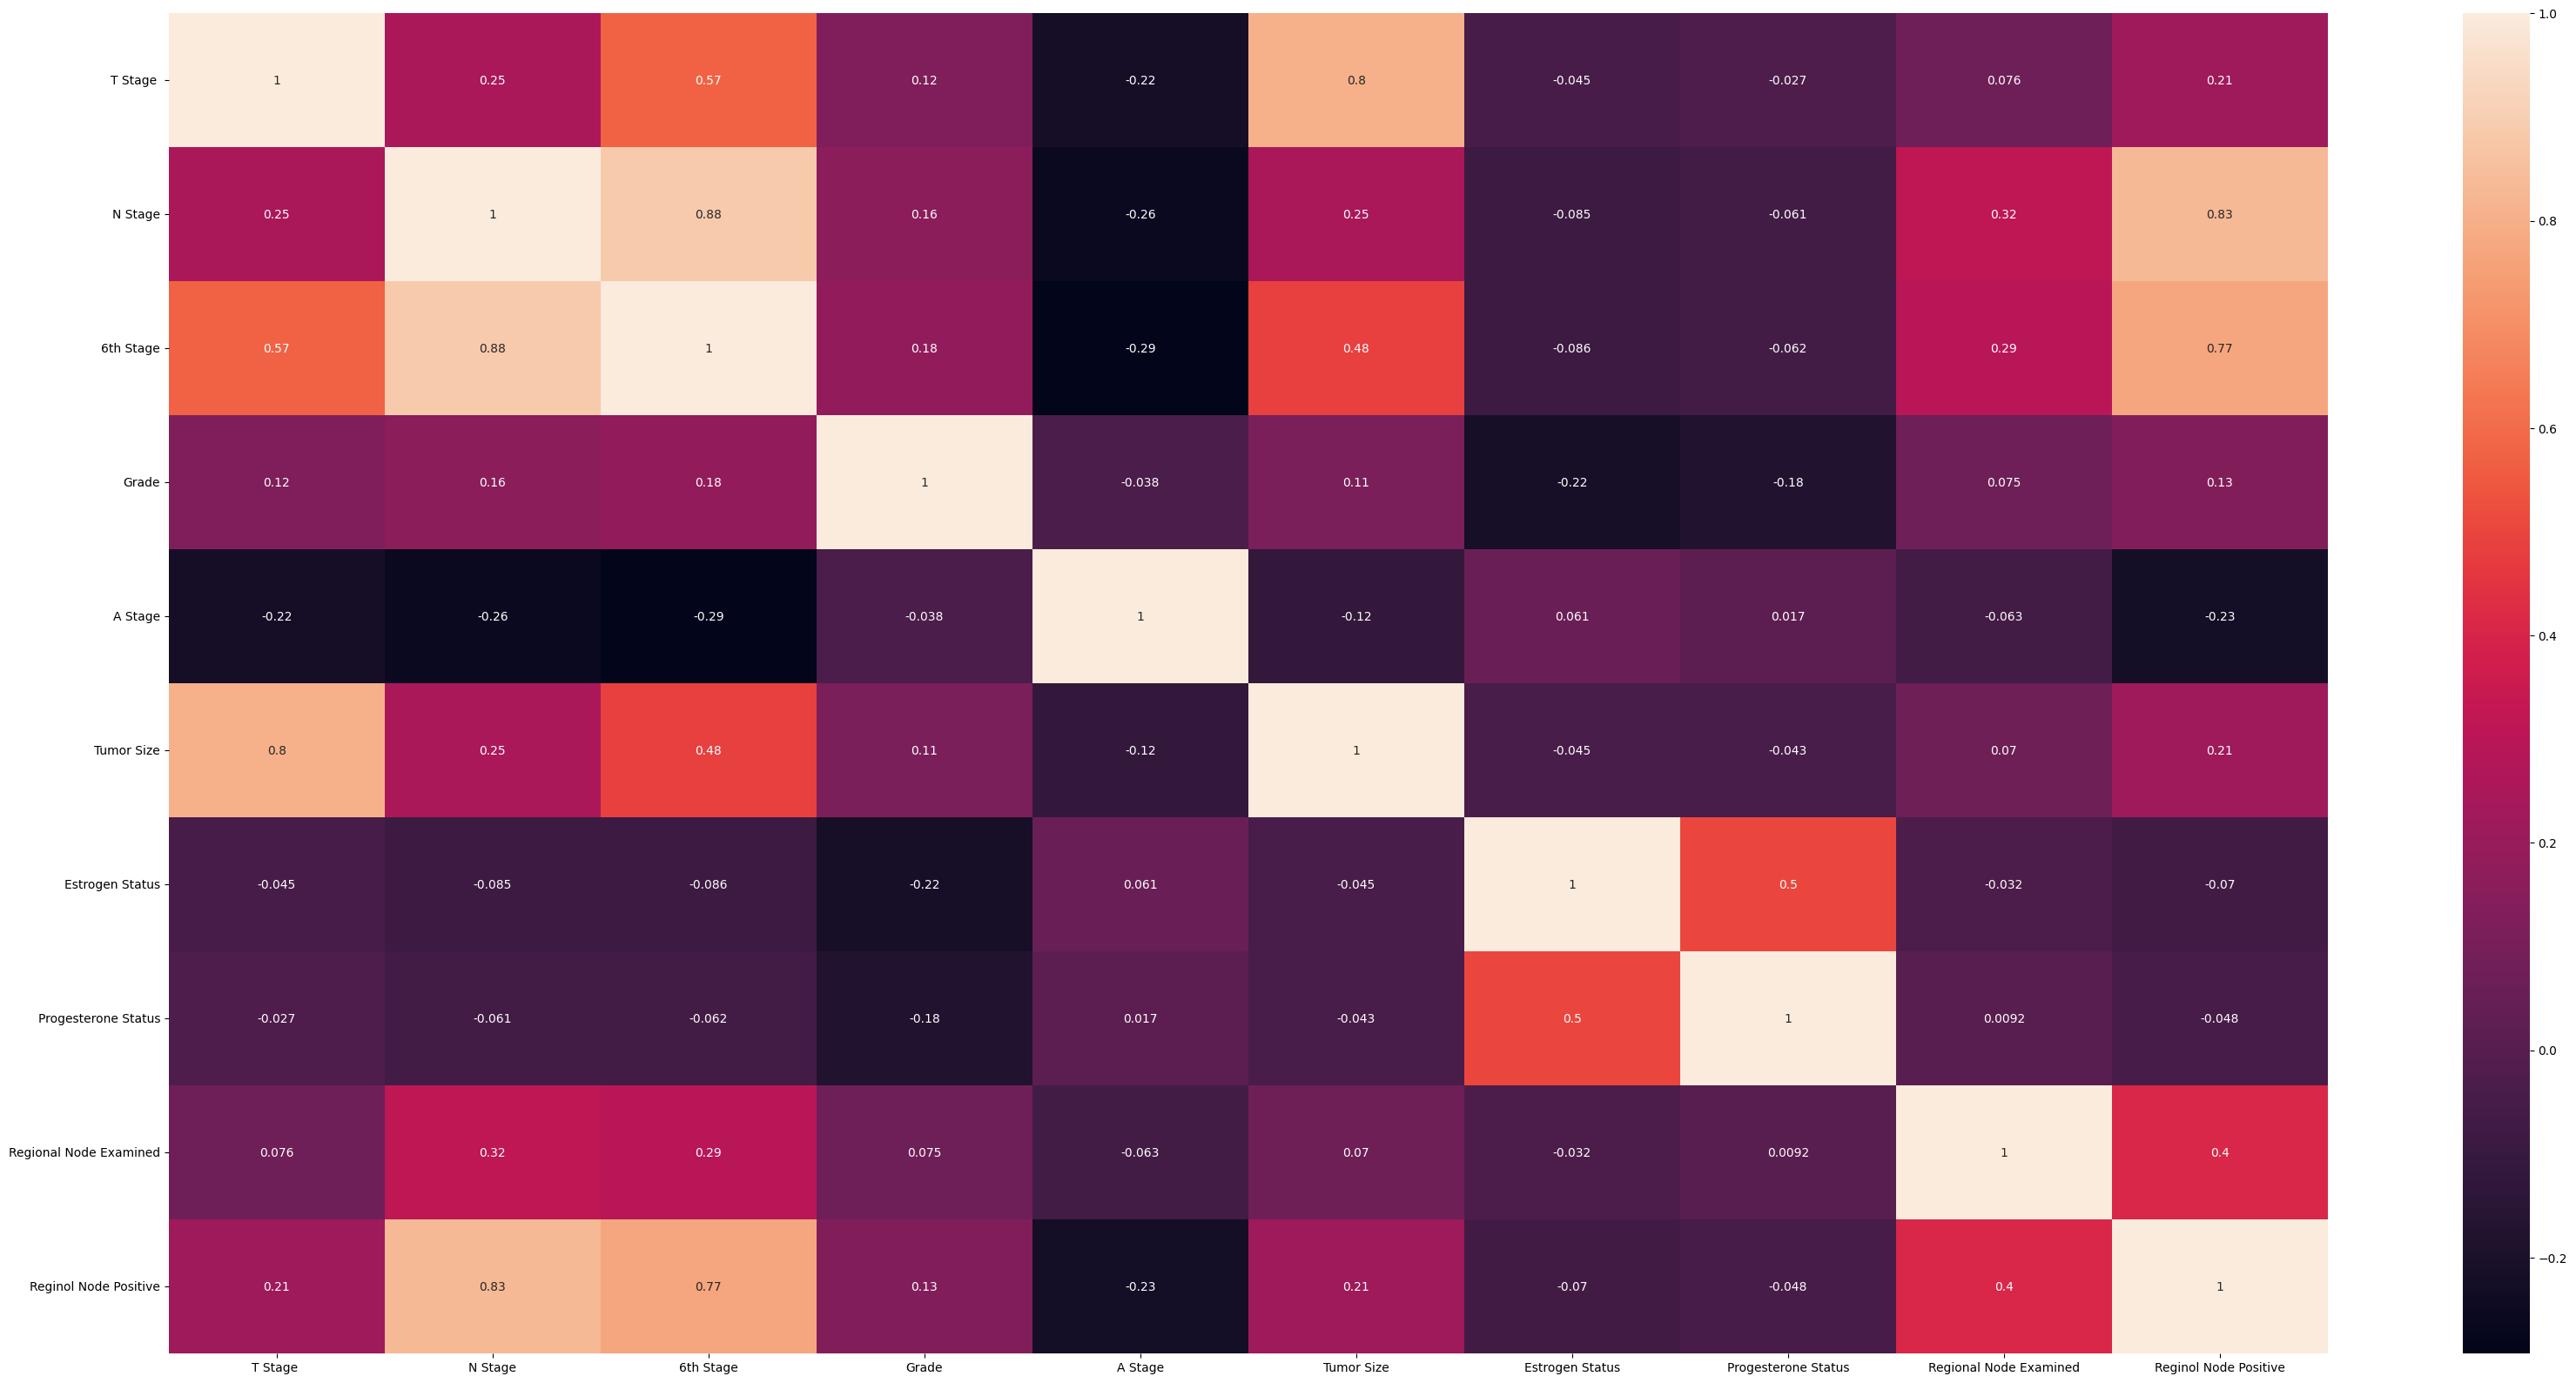

In [34]:
plt.figure(figsize=(40,20))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [35]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features=correlation(x_train,0.7)
len(set(corr_features))

2

In [37]:
corr_features

{'Reginol Node Positive', 'Tumor Size'}

In [38]:
models=LogisticRegression()

In [39]:
models.fit(x_train,y_train)

/home/mary/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#evaluating the performance of the model
pred=models.predict(x_test)

In [41]:
#getting the accracy score
prediction=accuracy_score(pred,y_test)
prediction

0.9025787965616046

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[178,   1,   0,   0,   0],
       [  0, 185,  11,   0,   1],
       [  2,  23, 168,   1,   4],
       [  0,   7,   0,   4,   0],
       [  0,   0,  18,   0,  95]])

<IPython.core.display.Javascript object>

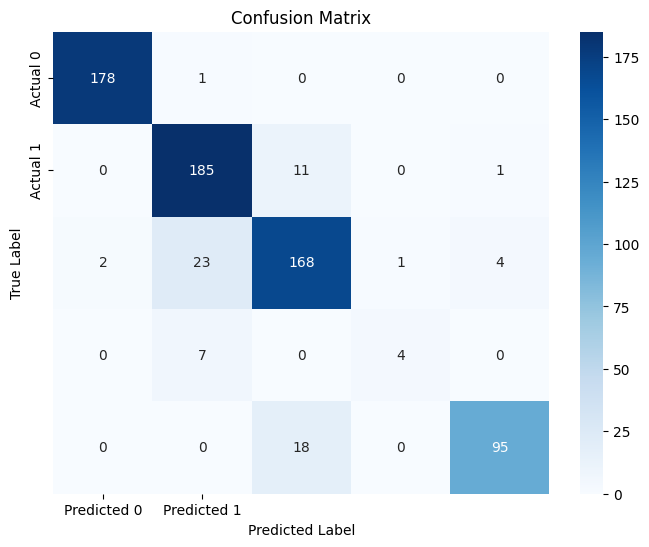

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

<IPython.core.display.Javascript object>

,precision,recall,f1-score,support
1,0.988889,0.994413,0.991643,179.000000
2,0.856481,0.939086,0.895884,197.000000
3,0.852792,0.848485,0.850633,198.000000
4,0.800000,0.363636,0.500000,11.000000
5,0.950000,0.840708,0.892019,113.000000
accuracy,0.902579,0.902579,0.902579,0.902579
macro avg,0.889632,0.797266,0.826036,698.000000
weighted avg,0.903640,0.902579,0.900740,698.000000


<IPython.core.display.Javascript object>

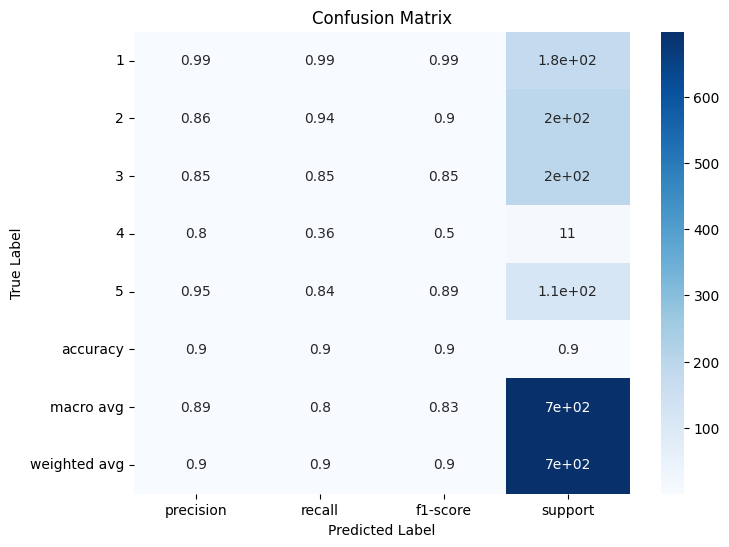

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [63]:
from sklearn.metrics import f1_score
f1_micro = f1_score(y_test, pred, average='micro')
print("F1 Score:", f1_micro)


F1 Score: 0.9025787965616046


In [64]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, pred, average='micro')
print("precision score:", prec)


precision score: 0.9025787965616046


In [66]:
from sklearn.metrics import recall_score
prec = recall_score(y_test, pred, average='micro')
print("precision score:", prec)


precision score: 0.9025787965616046


## Building a predictive model

In [43]:
y_test.iloc[5]

2

In [44]:
x_test.iloc[5]

T Stage                    1
N Stage                    0
Grade                      2
A Stage                    1
Tumor Size                40
Estrogen Status            1
Progesterone Status        1
Regional Node Examined    14
Reginol Node Positive      1
Name: 2236, dtype: int64

In [45]:
input_data=(2,1,2,1,60,1,1,26,9)

#changing input data into numpy array
convert=np.asarray(input_data)
#reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=models.predict(reshaping)
print(prediction)

<IPython.core.display.Javascript object>

[3]


/home/mary/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
import pickle
with open('cancer_stage.pkl', 'wb') as files:
    pickle.dump(models,files)